# Titanic Dataset Exploration and Machine Learning

## 1. Setting Up The Programming Environment

### First we must import all of the necessary packages:

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
import numpy as np
import pandas as pd
from sklearn import datasets, svm, cross_validation, tree, preprocessing, metrics
import sklearn.ensemble as ske
import seaborn 
seaborn.set() 
#import tensorflow as tf
#from tensorflow.contrib import skflow

### Let's now open the dataset we will be using:

In [4]:
df = pd.read_csv(r'C:\Users\Tsakota\Desktop\Halfway\Learn\Data\titanic3.csv', index_col=None, na_values=['NA'])

## 2. Data Exploration

### We currently do not know much about our data, so let us explore some of the features and observations (columns and rows):

In [5]:
df.head()

,Pclass,Survived,Name,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked,Boat,Body,Home.Dest
0,NaN,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [6]:
df.describe()

C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Pclass,Survived,Age,Sibsp,Parch,Fare,Body
count,1308.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.295872,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837390,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


#### We can see that the 'Age' column has less rows than the other columns. This indicates that there are NULL values present. Now let's look at the survival rate on the Titanic.

In [7]:
df['Survived'].mean()

0.3819709702062643

#### The survival rate was around 38%. I wonder how that changes when comparing between the different cabin classes.

In [8]:
df.groupby('Pclass').mean()

,Survived,Age,Sibsp,Parch,Fare,Body
Pclass,,,,,,
1.0,0.618012,39.195819,0.437888,0.366460,87.124431,162.828571
2.0,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3.0,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


#### As you can see, if you purchased a first class ticket, your chance of survival jumped to 63%.

#### I'm curious to see how the survival rates differ between women and men.

In [9]:
df.groupby(['Pclass','Sex']).mean()

Survived        Age     Sibsp     Parch        Fare        Body
Pclass Sex                                                                    
1.0    female  0.965035  37.098485  0.559441  0.475524  108.699622         NaN
       male    0.340782  41.029250  0.340782  0.279330   69.888385  162.828571
2.0    female  0.886792  27.499191  0.500000  0.650943   23.234827   52.000000
       male    0.146199  30.815401  0.327485  0.192982   19.904946  171.233333
3.0    female  0.490741  22.185307  0.791667  0.731481   15.324250  183.000000
       male    0.152130  25.962273  0.470588  0.255578   12.415462  151.854167

#### If you were a male in class 2 and 3, we likely would have never seen you again.

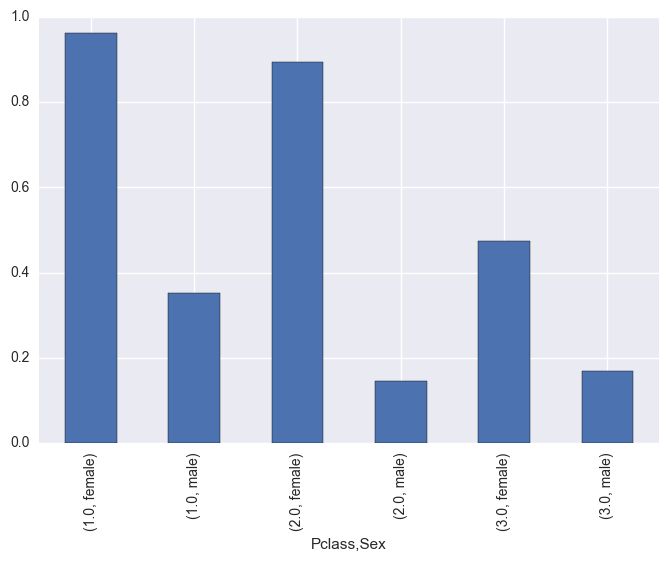

In [38]:
sexgroup = df.groupby(['Pclass','Sex']).mean()
sexgroup['Survived'].plot(kind='bar')

## 3. Machine Learning

##### Note: Before we can move to our predictive analysis, we first have to clean up the data and then split out our dataset into two smaller dataset that we will use for training and testing. 

### Let's clean and prepare the data:

In [10]:
df.count()

Pclass       1308
Survived     1309
Name         1309
Sex          1309
Age          1046
Sibsp        1309
Parch        1309
Ticket       1309
Fare         1308
Cabin         295
Embarked     1307
Boat          486
Body          121
Home.Dest     745
dtype: int64

#### We can drop the Cabin, Boat, Body, Home.Dest, Ticket, and Name columns entirely. The Ticket, Name, and Home.Dest values may have enough data points, but they are difficult to deal with within predictive algorithms and can lead to inaccuracies.

In [12]:
df = df.drop(['Body','Cabin','Boat','Home.Dest','Ticket','Name'], axis=1)

#### Now let us remove all rows with NULL values so that our conclusions related to age are as accurate as they can be.

In [28]:
df = df. dropna()

In [29]:
df.count()

Pclass      1042
Survived    1042
Sex         1042
Age         1042
Sibsp       1042
Parch       1042
Fare        1042
Embarked    1042
dtype: int64

#### Now this is what I'd call clean data!

#### Our 'Survived' and 'Embarked' columns are currently categorical. Machine Learning will handle these much easier if we convert them to integers. The below function accomplishes this goal.

In [32]:
def preprocess_titanic_df(df):
    processed_df = df.copy()          # We create a copy because original data indices can be manipulated if we don't
    le = preprocessing.LabelEncoder() # Comes with the sklearn package -- Can encode label with value between 0 and 1
    processed_df.Sex = le.fit_transform(processed_df.Sex) # labelencoder is applied to the Sex column.
    processed_df.Embarked = le.fit_transform(processed_df.Embarked)
    return processed_df


In [33]:
processed_df = preprocess_titanic_df(df)

In [35]:
x = processed_df.drop(['Survived'], axis=1).values
y = processed_df['Survived'].values

### Now we can run our model and observe its accuracy:

#### The following function magically splits out the data into a training set and a test set. We specify that 20% of our data is to be test data while 80% is to become training data. These are standard splits within machine learning.

In [40]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(x,y,test_size=0.2)

#### We now fit our tree using a maximum depth of 10 nodes. As you can see below, our accuracy score was 78%. 

In [41]:
clf_dt = tree.DecisionTreeClassifier(max_depth=10)  # max amount of nodes
clf_dt.fit (X_train, y_train)
clf_dt.score (X_test, y_test)

0.77990430622009566

#### One thing to note here is that we ran our predictive model based on one 80/20 split. There may be other split combinations that yield more accurate models, so let's use the shuffle validator to take into account miltiple splits. 

In [45]:
shuffle_validator = cross_validation.ShuffleSplit(len(x), n_iter=20, test_size=0.2, random_state=0)
def test_classifier(clf):
    scores = cross_validation.cross_val_score(clf, x, y, cv=shuffle_validator)
    print("Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std()))

In [46]:
test_classifier(clf_dt)

Accuracy: 0.7605 (+/- 0.03)


#### Splitting the dataset 20 different ways tells us that on any given split, our accuracy can range from 73% - 79%.